# Credit Card Fraud Detection

### Business Understanding

Credit Card Fraud Detection is a classic class-imbalance problem where the number of fraud transactions is much lesser than the number of legitimate transaction for any bank. 



In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

import warnings
warnings.filterwarnings("ignore")

### Data Understanding and exploration
The Dataset we use is the Kaggle Credit Card Fraud Detection Dataset enlisted in the following link: <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Link</a>


In [2]:
# Read Data into a Dataframe
df = pd.read_csv('data/creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

What kind of data do we have?

- 32 features from V1-V28 which are unknown for confidentiality, TIme, Amount and Class
- Input features= V1-V28, Time and Amount
- Target variable=Class

### Data Preparation

In [5]:
# Describe Data

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- The mean of the amount of money in transactions is 88.34
- The standard deviation of amount of money in transactions is 250.12
- The minimum of the amount of money is 0.0

In [7]:

zeroope=df[df.Amount==0].shape[0]/df.shape[0]*100
print('%0.2f percent of the transactions have 0.0 USD'%zeroope)

0.64 percent of the transactions have 0.0 USD


***Conclusion:*** We can remove all the transaction for 0.0 USD

In [8]:
df=df[df.Amount!=0]

- Check for NaN values

In [9]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

***Conclusion:*** The Data does not have any missing values and hence, need not be handled.

- Check for data type

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282982 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    282982 non-null  float64
 1   V1      282982 non-null  float64
 2   V2      282982 non-null  float64
 3   V3      282982 non-null  float64
 4   V4      282982 non-null  float64
 5   V5      282982 non-null  float64
 6   V6      282982 non-null  float64
 7   V7      282982 non-null  float64
 8   V8      282982 non-null  float64
 9   V9      282982 non-null  float64
 10  V10     282982 non-null  float64
 11  V11     282982 non-null  float64
 12  V12     282982 non-null  float64
 13  V13     282982 non-null  float64
 14  V14     282982 non-null  float64
 15  V15     282982 non-null  float64
 16  V16     282982 non-null  float64
 17  V17     282982 non-null  float64
 18  V18     282982 non-null  float64
 19  V19     282982 non-null  float64
 20  V20     282982 non-null  float64
 21  V21     282982 

***Conclusion:*** The Data has only Target Variable Class as the categorical variable:

    - 0: Legitimate Transactions
    - 1: Fraud Transactions
    
so no need to encode the features. 

- Look at the data

In [11]:
plt.rcParams['legend.numpoints']=1
plt.rcParams['xtick.major.size'] = 21
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 21
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.visible']=True #See minor tick
plt.rcParams['text.usetex']=False #use Latex
plt.rcParams['axes.linewidth']=2 #width axes
plt.rcParams['axes.labelsize']=20 #
plt.rcParams['ytick.labelsize']=16 #fontsize of tick labels
plt.rcParams['xtick.labelsize']=16 #fontsize of tick labels
plt.rcParams['ytick.direction']='inout' ## direction: in, out, or inout
plt.rcParams['xtick.direction']='inout' ## direction: in, out, or inout

plt.rcParams['xtick.major.top']=True #draw x axis top major ticks
plt.rcParams['xtick.major.bottom']=True #draw x axis bottom major ticks
plt.rcParams['xtick.minor.top']=True ## draw x axis top minor ticks
plt.rcParams['xtick.minor.bottom']=True #draw x axis bottom minor ticks

plt.rcParams['ytick.major.left']=True #draw y axis left major ticks
plt.rcParams['ytick.major.right']=True #draw y axis right major ticks
plt.rcParams['ytick.minor.left']=True ## draw y axis left minor ticks
plt.rcParams['ytick.minor.right']=True #draw y axis right minor ticks
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight'] = 'heavy'
		

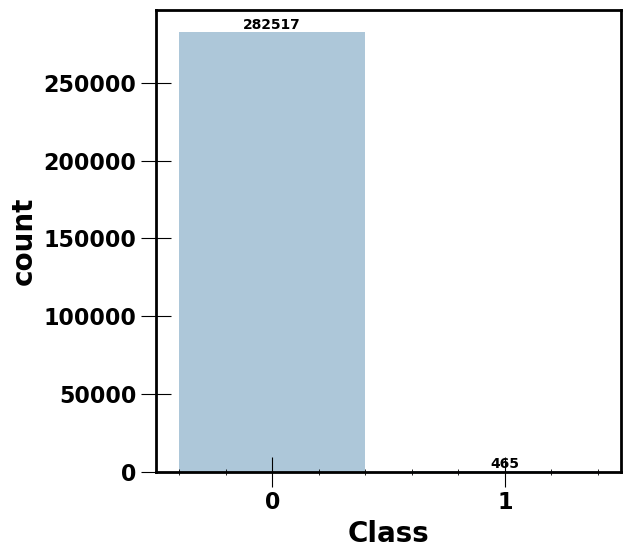

In [12]:

plt.figure(figsize=(6,6))
ax=sns.countplot(x='Class', data=df,alpha=0.4)
ax.bar_label(ax.containers[0])
plt.show()


        


***Conclusion:*** The Dataset is highly imbalanced :282517 class label '0' and only 465 class label '1'

We will have to balance our data otherwise:

- Overfitting: Our classification models will assume that in most cases there are no frauds! We want to detect the fraud
  
- Wrong Correlations: It will be useful to understand how each of this features influence the result.  With an imbalance dataframe we are not able to see the true correlations between the class and features.



### Do the frauds occur at a certain time or for a spefic amount of money?

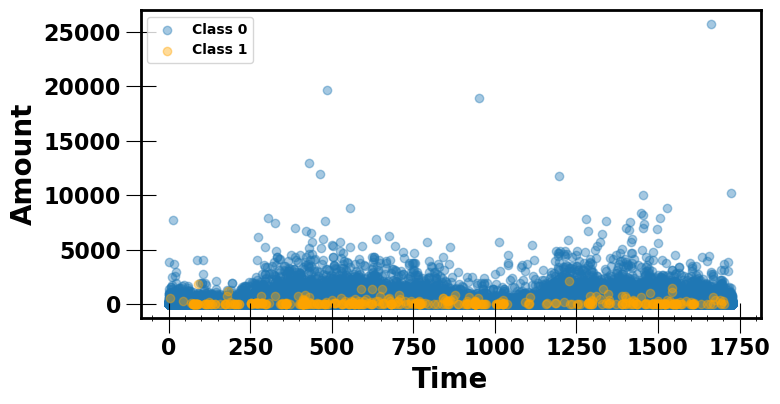

In [13]:
df_0=df[df.Class==0]
df_1=df[df.Class==1]

fig, ax1 = plt.subplots(figsize=(8,4), facecolor='w', edgecolor='k')
ax1.scatter(df_0.Time/100,df_0.Amount,marker='o',color='#1f77b4',alpha=0.4,label='Class 0')
ax1.scatter(df_1.Time/100,df_1.Amount,marker='o',color='orange',alpha=0.4,label='Class 1')
ax1.set_ylabel('Amount',fontsize=20,fontweight='bold')
ax1.set_xlabel('Time',fontsize=20,fontweight='bold')
ax1.legend()
plt.show()

In [14]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


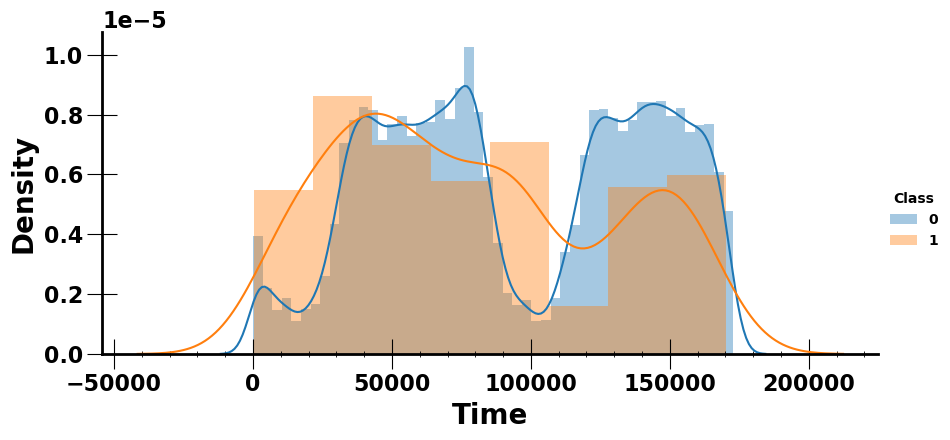

In [15]:
pd.DataFrame.iteritems = pd.DataFrame.items
sns.FacetGrid(df, hue="Class", height=4.5, aspect=2).map(sns.distplot,"Time").add_legend()
plt.show()

In [16]:
df_1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,...,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.0
mean,79620.589247,-4.869327,3.647041,-7.102202,4.491414,-3.293201,-1.385325,-5.616769,0.614583,-2.531900,...,0.766353,0.016797,-0.043881,-0.104358,0.037777,0.041494,0.167023,0.072914,129.307462,1.0
std,47782.967364,6.819839,4.285264,7.202713,2.905285,5.376655,1.852307,7.161898,6.734723,2.496280,...,3.842197,1.481098,1.598982,0.521401,0.803084,0.473501,1.383413,0.554196,262.298781,0.0
min,472.000000,-30.552380,-7.449015,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.320155,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.010000,1.0
25%,41204.000000,-6.159607,1.176270,-8.858204,2.286869,-4.801176,-2.513479,-8.427378,-0.233403,-3.845567,...,0.015255,-0.516242,-0.343058,-0.438908,-0.325033,-0.264325,-0.026219,-0.104285,1.000000,1.0
50%,72327.000000,-2.405580,2.660670,-5.047679,4.083047,-1.614608,-1.357746,-3.059245,0.591828,-2.064945,...,0.603127,0.092073,-0.072173,-0.061263,0.068951,-0.007772,0.390809,0.144774,17.060000,1.0
75%,125200.000000,-0.440095,5.125759,-2.276921,6.370895,0.130531,-0.400859,-0.954940,1.778492,-0.749277,...,1.325218,0.652932,0.335821,0.292539,0.465058,0.400348,0.830062,0.380246,111.700000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.316275,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


***Conclusion:*** The fraud transations are evenly distributed about time but they are genetally not above 2200 USD


#### Feature correlation


<Axes: >

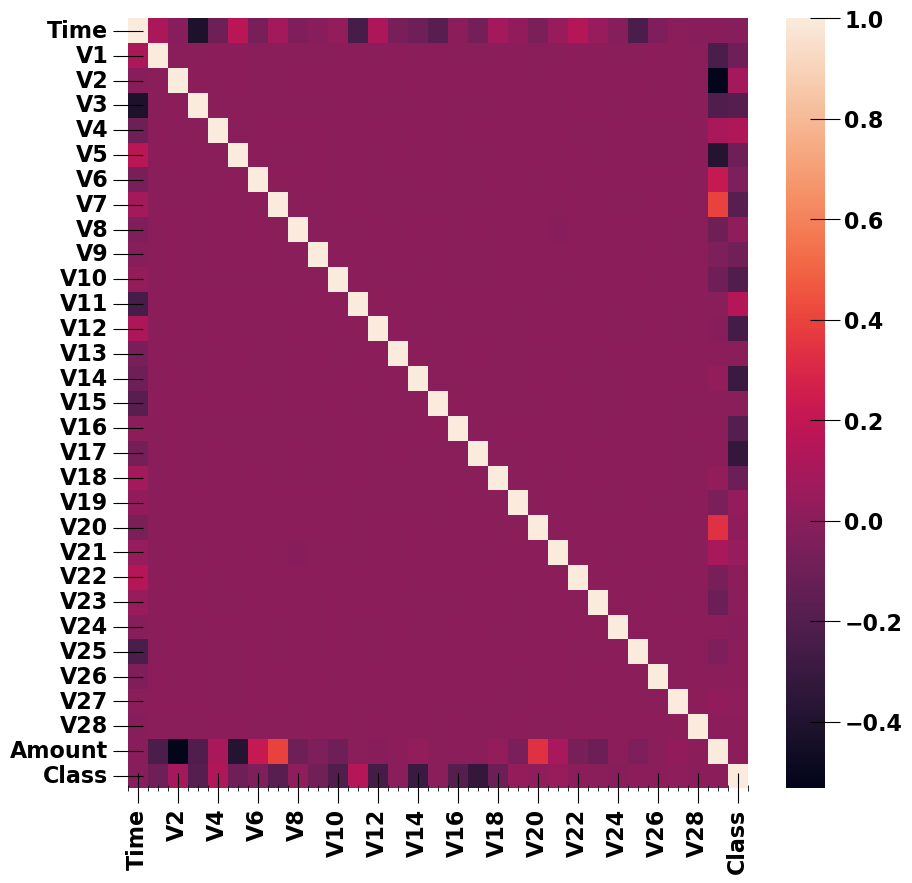

In [17]:
plt.figure(figsize=(10,10))
df_corr = df.corr()
sns.heatmap(df_corr)

***Conclusion:*** As mentionned previously, because the data are imbalanced, we do not see any clear correlation

#### Scale the data

In [18]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)




### Splitting the Data 

Before to balance our data, we need to separate the original dataframe. We want to test our model on the original data not on the data created by some technique.The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.


In [19]:
# Create Train and Test Data 
X = df.drop(labels='Class', axis=1) # Features
y = df.loc[:,'Class']               # Target Variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### How will you balance the fraud and legitimate transactions in data?

There are different techniques:

- Random Under-Sampling:consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting. Here we have only 465 fraud transactions; so we select randomly 465 good transation in order to have the same amount of transaction for both classes. After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

*but* our classification models will maybe not perform as accurate as we would like to since we loose a lot of information loss (bringing 465 non-fraud transaction from 282,517 non-fraud transaction)

- Synthetic Minority Oversampling TEchnique (SMOTE): is a technique where the synthetic samples are generated for the minority class. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.


In [52]:
# Use Synthetic Minority Oversampling
sm = SMOTE(k_neighbors=5,random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_test_res, y_test_res = sm.fit_resample(X_test, y_test)

print('Percentage 0: %0.0f'%(y_res[y_res==0].shape[0]/np.size(y_res)*100))
print('Percentage 1: %0.0f'%(y_res[y_res==1].shape[0]/np.size(y_res)*100))

Percentage 0: 50
Percentage 1: 50


In [21]:
new_df=X_res
new_df['Class']=y_res
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,0.517636,-2.097534,0.402507,-0.109043,-1.304116,0.915655,-0.629250,0.013078,0.976987,-0.014312,...,-1.419906,-0.379043,-0.820997,0.007516,0.878786,-0.112961,0.069613,5.859186,-0.940526,0
1,-0.598515,0.449311,2.349431,-1.903288,0.033870,-0.174573,0.430205,-0.207720,2.576061,-2.048897,...,-0.036294,-0.476701,-0.494822,0.586355,-0.791249,-0.082767,-0.159946,-0.147757,-0.736278,0
2,-0.481878,0.830538,1.173366,-0.216262,0.513291,0.181759,0.600870,0.134851,1.550983,-0.956821,...,-0.746198,-0.194205,-0.453552,-0.105918,0.082304,0.313586,0.171598,-0.312179,0.126580,0
3,1.579572,-0.981548,-0.830500,0.118704,-0.438087,-0.165795,-0.098302,-0.164349,0.951353,-0.338119,...,-0.425885,0.154705,0.503509,-0.488371,-0.325412,-0.032034,0.013781,3.084988,0.445475,0
4,1.104727,0.631171,0.673956,3.027423,-0.388405,-0.628974,0.019213,-0.050630,-0.274829,0.059083,...,-0.109780,-0.033792,0.847296,0.553307,0.044538,0.022087,0.051055,-0.206777,-0.626882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395519,0.026820,2.429026,-5.716521,4.228832,-1.957335,-2.022500,-4.538252,1.291188,-0.877027,-5.351676,...,0.095352,0.419951,0.027085,-1.492168,0.496407,0.689746,0.115503,-0.299139,-0.640466,1
395520,-1.607086,1.112589,-2.428590,1.007980,-1.102478,-1.110830,-2.672236,0.167809,-1.002696,-3.525680,...,1.057164,0.070584,-0.317757,-0.086374,0.087645,0.015732,-0.074431,-0.042439,0.372172,1
395521,-2.979048,2.208119,-4.852472,1.354559,-1.894397,-0.909599,-3.808281,1.771025,-0.287780,-5.340569,...,0.297701,0.303833,-0.281039,-0.202646,0.383369,0.019198,0.003933,0.524820,0.283384,1
395522,-1.596171,1.771425,-3.431894,0.614022,0.124970,-1.919415,-1.017742,0.021078,-1.764919,-2.635081,...,-0.555466,-0.107834,0.268436,0.221160,0.056655,-0.368169,0.323693,-0.070208,0.637269,1


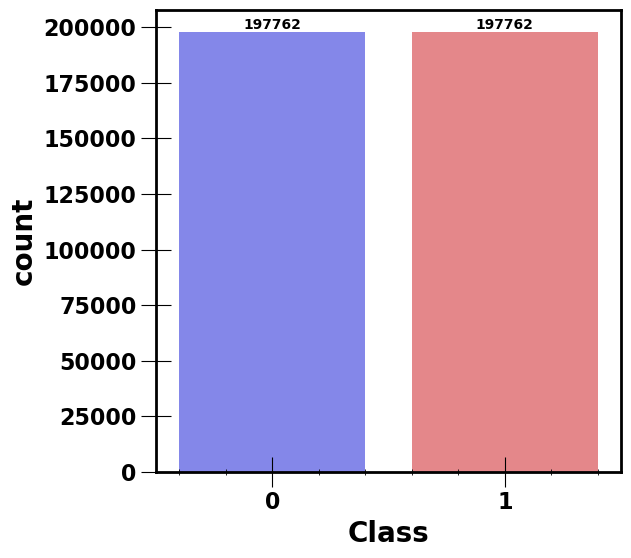

In [22]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x='Class', data=new_df,alpha=0.1)
ax=sns.countplot(x='Class', data=new_df,alpha=0.5,palette=['b','r'])

ax.bar_label(ax.containers[0])
plt.show()


#### Feature correlation


<Axes: >

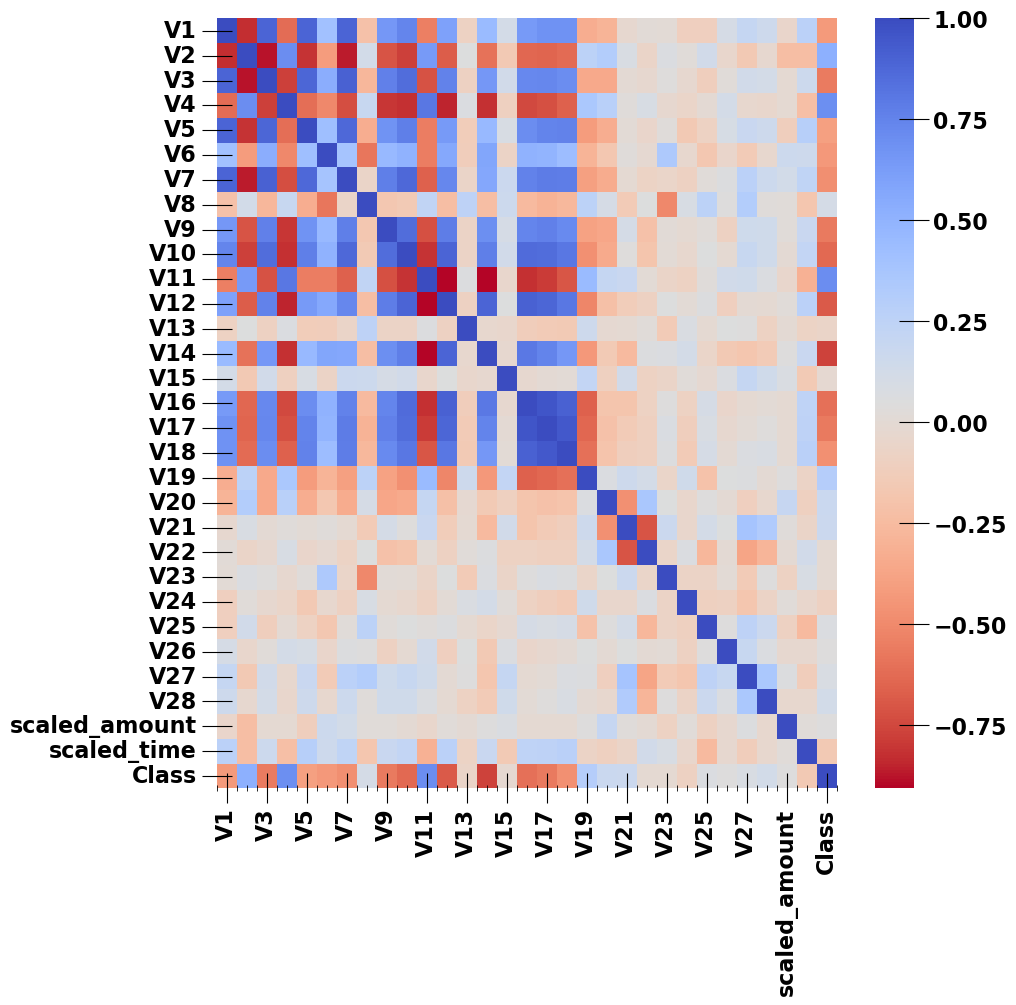

In [23]:
plt.figure(figsize=(10,10))
df_corr =new_df.corr()
sns.heatmap(df_corr,cmap='coolwarm_r')

In [24]:
X_res,y_res= new_df.drop(labels='Class', axis=1),new_df['Class']

In [25]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_res, y_res, discrete_features=False, random_state=1), index=X_train.columns)

In [26]:
mutual_infos.sort_values(ascending=False)

V14              0.503389
V17              0.463142
V10              0.444942
V12              0.421362
V11              0.410155
scaled_amount    0.396018
V4               0.393264
V16              0.375212
V3               0.354204
V7               0.318426
V2               0.295315
V21              0.256630
V9               0.255598
V27              0.239512
V18              0.225257
V1               0.208710
V6               0.185575
V28              0.179062
V8               0.170026
V5               0.169823
V19              0.129778
V20              0.125872
scaled_time      0.118060
V24              0.076065
V23              0.069656
V26              0.061673
V25              0.042323
V22              0.035240
V15              0.024457
V13              0.023541
dtype: float64

- Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

- Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction. 

### Remove outliers

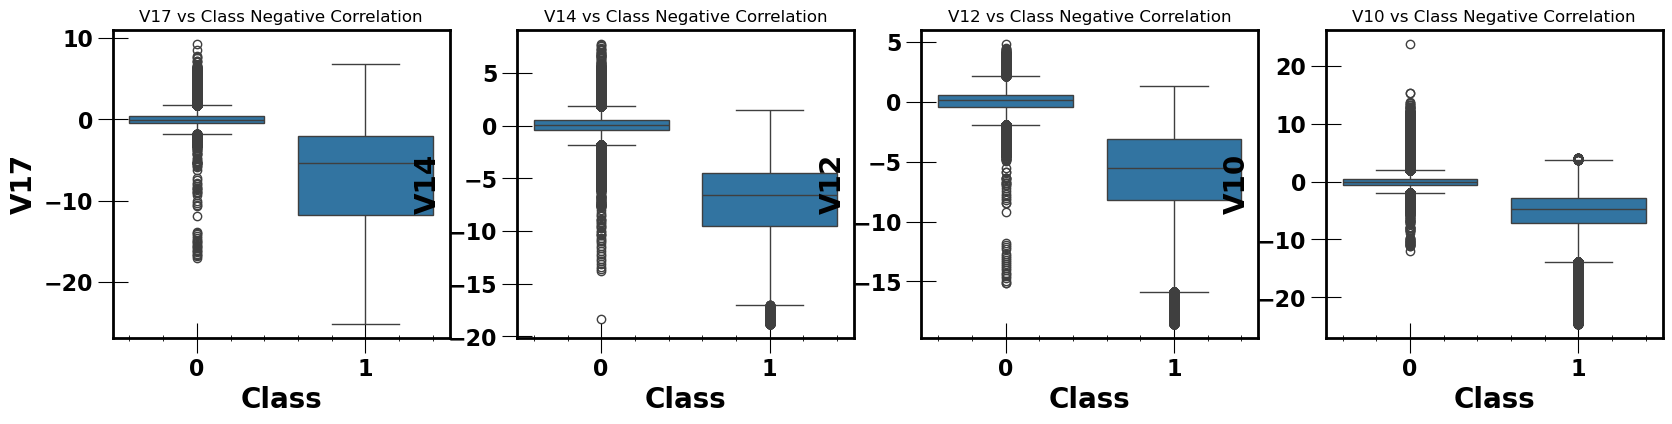

In [27]:


f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()



In [28]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
#print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
#print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
#print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))


Quartile 25: -9.486860891431178 | Quartile 75: -4.4548760989423775
iqr: 5.0319847924888
Cut Off: 7.547977188733201
V14 Lower: -17.034838080164377
V14 Upper: 3.0931010897908235
Feature V14 Outliers for Fraud Cases: 1743
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -15.606329446486889
V12 Upper: 4.456858662325658
Feature V12 Outliers for Fraud Cases: 8266
Number of Instances after outliers removal: 385108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -12.113281358346445
V10 Upper: 3.0313161513740545
Feature V10 Outliers for Fraud Cases: 19755
Number of Instances after outliers removal: 363182


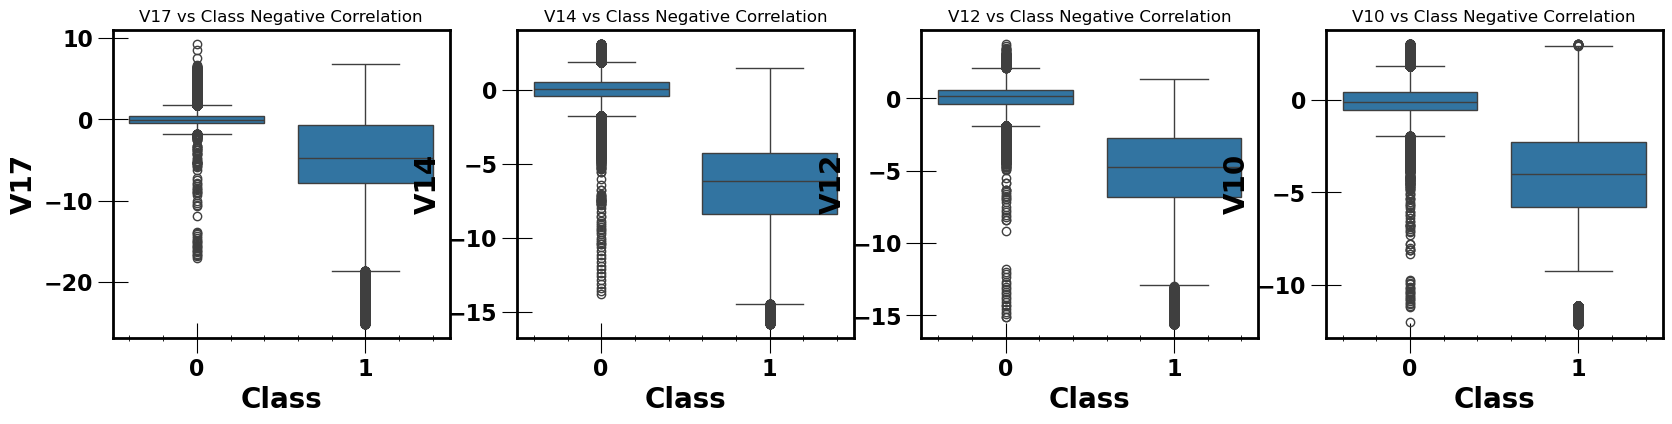

In [29]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

### Evaluation

We make use of AUC-ROC Score, Classification Report, Accuracy and F1-Score to evaluate the performance of the classifiers

In [ ]:
# Evaluation of Classifiers
def grid_eval(grid_clf):
    """
        Method to Compute the best score and parameters computed by grid search
        Parameter:
            grid_clf: The Grid Search Classifier 
    """
    print("Best Score", grid_clf.best_score_)
    print("Best Parameter", grid_clf.best_params_)
    
def evaluation(y_test, grid_clf, X_test):
    """
        Method to compute the following:
            1. Classification Report
            2. F1-score
            3. AUC-ROC score
            4. Accuracy
        Parameters:
            y_test: The target variable test set
            grid_clf: Grid classifier selected
            X_test: Input Feature Test Set
    """
    y_pred = grid_clf.predict(X_test)
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred))
    
    print('AUC-ROC')
    print(roc_auc_score(y_test, y_pred))
      
    print('F1-Score')
    print(f1_score(y_test, y_pred))
    
    print('Accuracy')
    print(accuracy_score(y_test, y_pred))

#### SGDClassifier

In [ ]:
# We set pipelines for each classifier unique with parameters
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)


grid_sgd.fit(X_res, y_res)

In [ ]:
grid_eval(grid_sgd)

In [ ]:
evaluation(y_test, grid_sgd, X_test)

#### Random Forest classifier

In [ ]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])
param_grid_rf = {'model__n_estimators': [75]}
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_rf.fit(X_res, y_res)

In [ ]:
grid_eval(grid_rf)

In [ ]:
evaluation(y_test, grid_rf, X_test)

#### Logistic Regression

In [ ]:
pipeline_lr = Pipeline([
    ('model', LogisticRegression(random_state=1))
])
param_grid_lr = {'model__penalty': ['l2'],
                 'model__class_weight': [None, 'balanced']}
grid_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_lr.fit(X_res, y_res)

In [ ]:
grid_eval(grid_lr)

In [ ]:
evaluation(y_test, grid_lr, X_test)

#### KNN classifier

In [ ]:
pipeline_knn = Pipeline([
    ('model', KNeighborsClassifier(n_neighbors=5))
])
param_grid_knn = {'model__p': [2]} #2 groups for 2 classes
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)
grid_knn.fit(X_res, y_res)

In [ ]:
grid_eval(grid_knn)

In [ ]:
evaluation(y_test, grid_knn, X_test)

#### Convolutional Neural Network

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Dense, Flatten
from tensorflow.python.keras.optimizers import adam_v2


In [53]:
xtrain3d = X_res.values.reshape(X_res.shape[0],X_res.shape[1],1)
xtest3d = X_test_res.values.reshape(X_test_res.shape[0],X_test_res.shape[1],1)
y_res_cnn = np.reshape(y_res, (-1, 1))
y_test_cnn = np.reshape(y_test_res, (-1, 1))

In [54]:
# Print shapes of input data and target labels
print("xtrain3d shape:", xtrain3d.shape)
print("xtest3d shape:", xtest3d.shape)
print("y_res_cnn shape:", y_res_cnn.shape)
print("y_test_cnn shape:", y_test_cnn.shape)

xtrain3d shape: (395524, 30, 1)
xtest3d shape: (169510, 30, 1)
y_res_cnn shape: (395524, 1)
y_test_cnn shape: (169510, 1)


In [67]:
# Define the CNN model
cnn = Sequential()
# First Layer:
cnn.add(Conv1D(32, 2, activation = "relu", input_shape = (30,1)))
cnn.add(Dropout(0.1))

# Second Layer:

cnn.add(BatchNormalization()) # Batch normalization is a technique for training very deep neural networks 
                               # that standardizes the inputs to a layer for each mini-batch. This 
                               # has the effect of stabilizing the learning process and dramatically
                               # reducing the number of training epochs required to train deep networks

cnn.add(Conv1D(64, 2, activation = "relu"))
cnn.add(Dropout(0.2))          # prevents over-fitting (randomly remove some neurons)

# Flattening Layer:
cnn.add(Flatten())
cnn.add(Dropout(0.4))
cnn.add(Dense(64, activation = "relu"))
cnn.add(Dropout(0.5))

# Add Dense layer for binary classification with sigmoid activation
cnn.add(Dense(1, activation = "sigmoid"))



# Print model summary
cnn.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)              │ (None, 29, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 29, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 29, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 28, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       114,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,201 (465.63 KB)

 Trainable params: 119,137 (465.38 KB)

 Non-trainable params: 64 (256.00 B)

In [68]:


from keras.utils import plot_model
#plot_model(cnn)



In [69]:
from tensorflow.keras.optimizers import Adam
# Define optimizer
opt = Adam(learning_rate=1e-6, decay=1e-6)

# Compile model
cnn.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)
history = cnn.fit(xtrain3d, y_res_cnn, epochs=10, validation_data=(xtest3d, y_test_cnn), verbose=1)

Epoch 1/10
12361/12361 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.7421 - loss: 0.5178 - val_accuracy: 0.9103 - val_loss: 0.2323
Epoch 2/10
12361/12361 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9254 - loss: 0.2187 - val_accuracy: 0.9153 - val_loss: 0.2067
Epoch 3/10
12361/12361 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.9343 - loss: 0.1864 - val_accuracy: 0.9192 - val_loss: 0.1931
Epoch 4/10
12361/12361 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.9379 - loss: 0.1714 - val_accuracy: 0.9232 - val_loss: 0.1829
Epoch 5/10
12361/12361 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9398 - loss: 0.1610 - val_accuracy: 0.9251 - val_loss: 0.1777
Epoch 6/10
12361/12361 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.9415 - loss: 0.1548 - val_accuracy: 0.9262 - val_loss: 0.1715
Epoch 7/10
12361/12361 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.9433 - loss: 0.1486 - val_accuracy: 0.9270 - val_loss: 0.1697
Epoch 8/10
12361/12361 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 

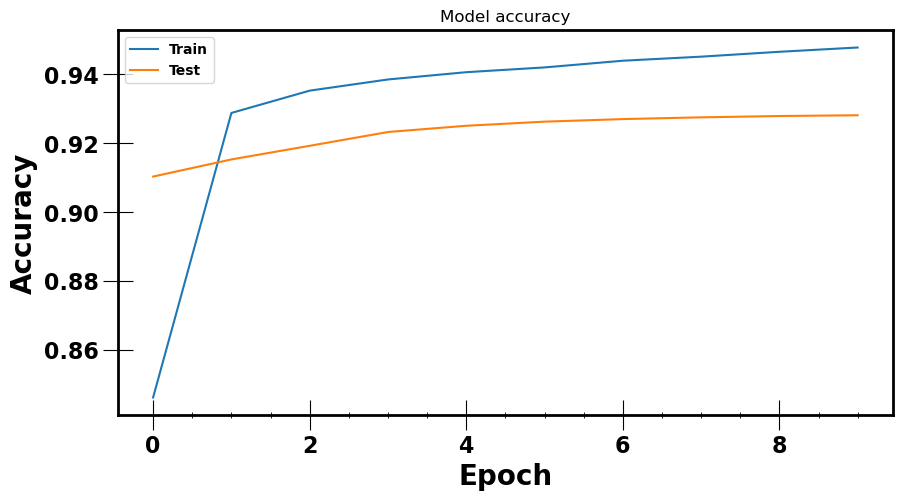

In [70]:


fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()



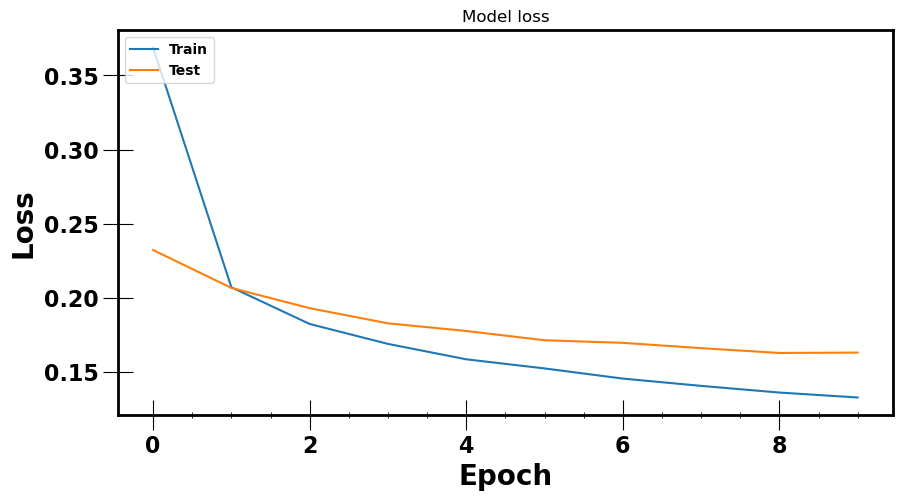

In [71]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()


5298/5298 ━━━━━━━━━━━━━━━━━━━━ 3s 647us/step


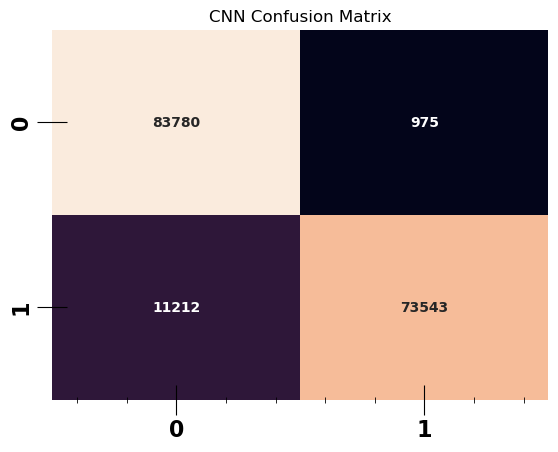

In [94]:
from sklearn.metrics import confusion_matrix
cnn_predictions = (cnn.predict(X_test_res) > 0.5).astype("int32")

confusion_matrix = confusion_matrix(y_test_res, cnn_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cbar = False)
plt.title("CNN Confusion Matrix")
plt.show()

In [95]:
accuracy_score(y_test_res, cnn_predictions)

0.92810453660551

In [96]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test_res, cnn_predictions)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.88196901 0.98691591]
recall: [0.98849625 0.86771282]
fscore: [0.93219915 0.92348358]
support: [84755 84755]
